In [8]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [82]:
salem_data = {
    "date": ["2023-10-20", "2024-01-06", "2024-12-03"],  # List of dates
    "Crea": [195, 181, 160],  # Values for "Crea"
    "T4": [9.3, 10.3, 16.8],    # Values for "T4"
    "TSH": [np.nan, 4.76, 0.53],   # Values for "TSH"
    "2xLevo": [np.nan,np.nan, 0.025]
}

# Create the DataFrame
salem = pd.DataFrame(salem_data)

# Convert the "date" column to datetime format (optional but recommended)
salem["date"] = pd.to_datetime(salem["date"])

In [83]:
cleo_data = {
    "date": ["2023-10-20", "2024-01-06", "2024-12-02"],  # List of dates
    "Crea": [259, 201, 191],  # Values for "Crea"
    "T4": [0, 10.6, 19.3],    # Values for "T4"
    "TSH": [3.75, 5.04, 2.31],   # Values for "TSH"
    "2xLevo": [np.nan,0.04, 0.075]
}

# Create the DataFrame
cleo = pd.DataFrame(cleo_data)

# Convert the "date" column to datetime format (optional but recommended)
cleo["date"] = pd.to_datetime(cleo["date"])

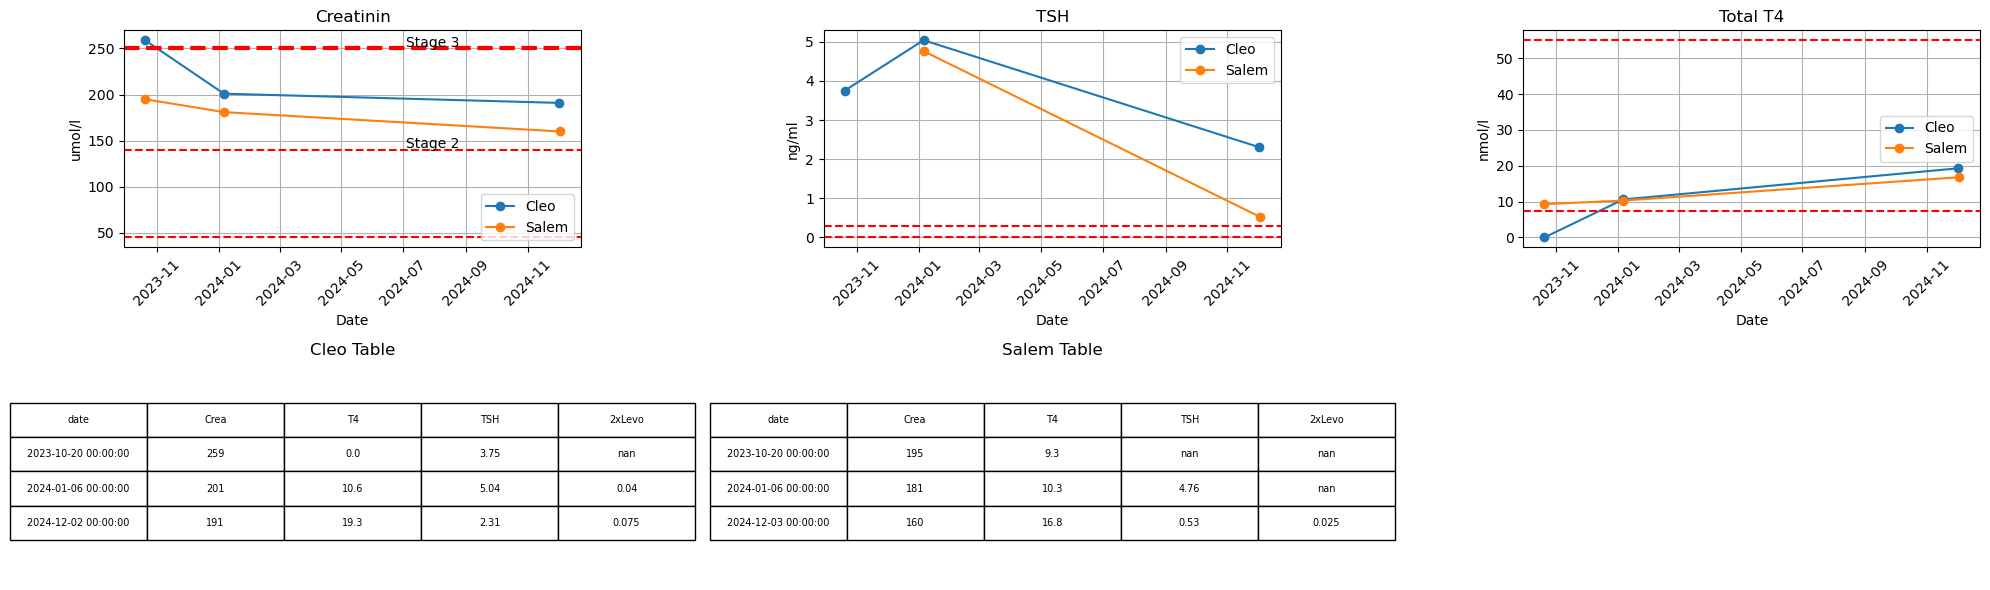

In [104]:
f = plt.figure(figsize=(20,6))

crea_range = [45,140,250]
t4_range = [7.5,55]
tsh_range = [0,0.3]

ax = f.add_subplot(231)
plt.title('Creatinin')
ax.plot(cleo["date"], cleo["Crea"], label="Cleo", marker="o")
ax.plot(salem["date"], salem["Crea"], label="Salem", marker="o")
ax.axhline(crea_range[0], linestyle='dashed', color='r')
ax.axhline(crea_range[1], linestyle='dashed', color='r')
ax.axhline(crea_range[2], linestyle='dashed', color='r', linewidth=3)
plt.text(cleo["date"][1]+pd.Timedelta(180, "d"), 142, 'Stage 2')
plt.text(cleo["date"][1]+pd.Timedelta(180, "d"), 252, 'Stage 3')
plt.xlabel("Date")
plt.ylabel("umol/l")
plt.legend(loc='lower right')
plt.grid(True)
plt.xticks(rotation=45)

ax = f.add_subplot(232)
plt.title('TSH')
ax.plot(cleo["date"], cleo["TSH"], label="Cleo", marker="o")
ax.plot(salem["date"], salem["TSH"], label="Salem", marker="o")
ax.axhline(tsh_range[0], linestyle='dashed', color='r')
ax.axhline(tsh_range[1], linestyle='dashed', color='r')
plt.xlabel("Date")
plt.ylabel("ng/ml")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)


ax = f.add_subplot(233)
plt.title('Total T4')
ax.plot(cleo["date"], cleo["T4"], label="Cleo", marker="o")
ax.plot(salem["date"], salem["T4"], label="Salem", marker="o")
ax.axhline(t4_range[0], linestyle='dashed', color='r')
ax.axhline(t4_range[1], linestyle='dashed', color='r')
plt.xlabel("Date")
plt.ylabel("nmol/l")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Plot the table in the second subplot
# Hide the second axis
ax = f.add_subplot(234)
ax.axis("tight")
ax.axis("off")

# Create a table
table = ax.table(
    cellText=cleo.values,  # Data values as a list
    colLabels=cleo.columns,  # Column names
    cellLoc="center",  # Center align text in table cells
    loc="center"  # Position the table at the center of the subplot
)
# Increase font size for Salem table
for key, cell in table.get_celld().items():
    cell.set_fontsize(60)  # Adjust font size as needed

table.scale(1.5, 2)  # may help
plt.title('Cleo Table')

ax = f.add_subplot(235)
ax.axis("tight")
ax.axis("off")

# Create a table
table = ax.table(
    cellText=salem.values,  # Data values as a list
    colLabels=salem.columns,  # Column names
    cellLoc="center",  # Center align text in table cells
    loc="center"  # Position the table at the center of the subplot
)
table.set_fontsize(60)
table.scale(1.5, 2)  # may help
plt.title('Salem Table')



plt.tight_layout()

plt.show()